<a href="https://colab.research.google.com/github/CSCCNY/final-project-recomposeclassics/blob/main/Segmented_Wavs_Spectograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Recompose Classics : **Data Preprocessing**
Hannah Do

May 4th, 2021



---


##### **Summary**

1. Conversion of **midi** to **wav** files :

 *fluidsynth*


2. Segmenting each **wav** files into smaller  pieces (15 sec)  :

 *pydub - AudioSegment*


3. Conversion of **wav** files to **spectograms** :

  *librosa*


---

**Mount from Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


**Get folder with Chopin classics only**

In [4]:
import os
import matplotlib.pyplot as plt

import librosa
import librosa.display

import IPython.display as ipd

import numpy as np
import random

In [3]:
audio_fpath = "/content/gdrive/My Drive/Classics_DNN/"
audio_clips = os.listdir(audio_fpath+'chopin_midi/')
print("No. of .midi files in audio folder = ",len(audio_clips))

No. of .midi files in audio folder =  48


**Imports to convert midi files into wav files - fluidsynth**

In [ ]:
!sudo apt install fluidsynth
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2

!cp /content/gdrive/My\ Drive/Classics_DNN/unzipped_classics/chopin_midi/*.mid /content/mids/

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libfluidsynth1 libqt5x11extras5 qsynth
Suggested packages:
  fluid-soundfont-gs timidity jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libfluidsynth1 libqt5x11extras5 qsynth
0 upgraded, 5 newly installed, 0 to remove and 31 not upgraded.
Need to get 120 MB of archives.
After this operation, 150 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fluid-soundfont-gm all 3.1-5.1 [119 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libfluidsynth1 amd64 1.1.9-1 [137 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fluidsynth amd64 1.1.9-1 [20.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libqt5x11extras5 amd64 5.9.5-0ubuntu1 [8,596 B]
Get:5 http://archive.ubuntu.com/ubuntu bionic/uni

**Change of directory to 'content' during 'midi to wav' conversion and back to google drive folder to avoid shell script error**

In [ ]:

i=0
for i in range(len(audio_clips)):
  ! fluidsynth -ni font.sf2 {'/content/mids/'+audio_clips[i]} -F {'/content/wavs/'+os.path.splitext(audio_clips[i])[0]+'.wav'} -r 44100
  print(os.path.splitext(audio_clips[i])[0]+'.wav file downloaded \n')
  i += 1


In [ ]:
!cp /content/wavs/*wav /content/gdrive/My\ Drive/Classics_DNN/unzipped_classics/chopin_wav

**Open through librosa as numpy array**

In [ ]:
audio_fpath = '/content/gdrive/My Drive/Classics_DNN/unzipped_classics/chopin_wav/'
audio_clips = os.listdir(audio_fpath)

x, sr = librosa.load(audio_fpath+audio_clips[0], sr=44100)

print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(4918720,) 44100


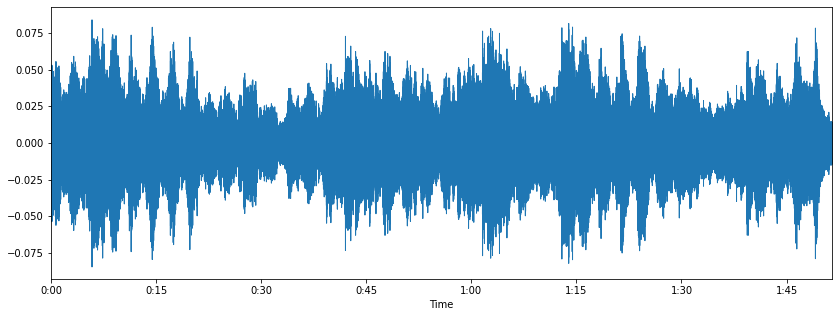

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)


**Segment the wav files into 15 second wav files with 5 seconds of overlap**

In [11]:
! pip install pydub

In [12]:
from pydub import AudioSegment
import math

C:\Users\SAMSUNG\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [9]:


class SplitWavFiles():
    def __init__(self, folder, folder2, filename):
        self.folder = folder
        self.folder2 = folder2
        self.filename = filename
        self.filepath = folder + filename
        
        self.audio = AudioSegment.from_wav(self.filepath)

    def get_duration(self):
        return self.audio.duration_seconds
    
    def single_split(self, from_min, to_min, split_filename):
        t1 = from_min * 1000
        t2 = to_min * 1000
        split_audio = self.audio[t1:t2]
        split_audio.export(self.folder2 + split_filename, format="wav")
        
    def multiple_split(self, sec_per_split):
        total_mins = math.ceil(self.get_duration())
        # overlap of every 5 seconds
        for i in range(0, total_mins, 5):
            split_fn = str(i) + '_' +  self.filename 
            self.single_split(i, i+sec_per_split, split_fn)
            print(str(i) + ' Done')
            if i == total_mins - sec_per_split:
                print('')

In [3]:
orig_filepath = '/Users/SAMSUNG/Downloads/dnn_data/chopin_full_wavs/'
segmented_filepath = '/Users/SAMSUNG/Downloads/dnn_data/chopin_segmented_wavs/'
audio_clips = os.listdir(orig_filepath)

In [4]:
print("No. of files in Original Wavs folder = ",len(audio_clips))

No. of files in Original Wavs folder =  48


In [12]:

for i in audio_clips:

  split_wav = SplitWavFiles(orig_filepath, segmented_filepath, i)
  # split wav files to 15 sec each
  split_wav.multiple_split(sec_per_split=15)

  print('\n' + i +' file splitted into 15 sec files \n\n')


In [13]:

segmented_filepath = '/content/gdrive/My Drive/Classics_DNN/chopin_segmented_wavs/'
audio_clips = os.listdir(segmented_filepath)


In [14]:
print("No. of files in Segmented Wavs folder = ",len(audio_clips))

No. of files in Segmented Wavs folder =  1575


**Segment the wav files into halves for input and output data**

In [16]:

class SplitWavFiles2():
    def __init__(self, folder, folder2, filename):
        self.folder = folder
        self.folder2 = folder2
        self.filename = filename
        self.filepath = folder + filename
        
        self.audio = AudioSegment.from_wav(self.filepath)

    def get_duration2(self):
        return self.audio.duration_seconds
    
    def single_split2(self, from_min, to_min, split_filename):
        t1 = from_min * 1000
        t2 = to_min * 1000
        split_audio = self.audio[t1:t2]
        split_audio.export(self.folder2 + split_filename, format="wav")
        
    def multiple_split2(self, sec_per_split):
        total_mins = math.ceil(self.get_duration2())
        
        split_fn = 'in_' +  self.filename 
        self.single_split2(0, 7.5, split_fn)
        print(split_fn + ' Done')
        if i == total_mins - sec_per_split:
            print('left over wav file')

        split_fn = 'out_' +  self.filename 
        self.single_split2(7.5, 15, split_fn)
        print(split_fn + ' Done')
        if i == total_mins - sec_per_split:
            print('left over wav file')

In [17]:
orig_filepath = '/Users/SAMSUNG/Downloads/dnn_data/chopin_segmented_wavs/'
segmented_filepath = '/Users/SAMSUNG/Downloads/dnn_data/chopin_inout/'
audio_clips = os.listdir(orig_filepath)

In [18]:

for i in audio_clips:

  split_wav = SplitWavFiles2(orig_filepath, segmented_filepath, i)
  # split wav files to 15 sec each
  split_wav.multiple_split2(sec_per_split=7.5)

  print('\n' + i +' file splitted into 7.5 sec files \n\n')

in_0_chpn-p1.wav Done
out_0_chpn-p1.wav Done

0_chpn-p1.wav file splitted into 7.5 sec files 


in_0_chpn-p10.wav Done
out_0_chpn-p10.wav Done

0_chpn-p10.wav file splitted into 7.5 sec files 


in_0_chpn-p11.wav Done
out_0_chpn-p11.wav Done

0_chpn-p11.wav file splitted into 7.5 sec files 


in_0_chpn-p12.wav Done
out_0_chpn-p12.wav Done

0_chpn-p12.wav file splitted into 7.5 sec files 


in_0_chpn-p13.wav Done
out_0_chpn-p13.wav Done

0_chpn-p13.wav file splitted into 7.5 sec files 


in_0_chpn-p14.wav Done
out_0_chpn-p14.wav Done

0_chpn-p14.wav file splitted into 7.5 sec files 


in_0_chpn-p15.wav Done
out_0_chpn-p15.wav Done

0_chpn-p15.wav file splitted into 7.5 sec files 


in_0_chpn-p16.wav Done
out_0_chpn-p16.wav Done

0_chpn-p16.wav file splitted into 7.5 sec files 


in_0_chpn-p17.wav Done
out_0_chpn-p17.wav Done

0_chpn-p17.wav file splitted into 7.5 sec files 


in_0_chpn-p18.wav Done
out_0_chpn-p18.wav Done

0_chpn-p18.wav file splitted into 7.5 sec files 


in_0_chpn-p19

in_105_chpn_op33_4.wav Done
out_105_chpn_op33_4.wav Done

105_chpn_op33_4.wav file splitted into 7.5 sec files 


in_105_chpn_op35_1.wav Done
out_105_chpn_op35_1.wav Done

105_chpn_op35_1.wav file splitted into 7.5 sec files 


in_105_chpn_op35_2.wav Done
out_105_chpn_op35_2.wav Done

105_chpn_op35_2.wav file splitted into 7.5 sec files 


in_105_chpn_op35_3.wav Done
out_105_chpn_op35_3.wav Done

105_chpn_op35_3.wav file splitted into 7.5 sec files 


in_105_chpn_op53.wav Done
out_105_chpn_op53.wav Done

105_chpn_op53.wav file splitted into 7.5 sec files 


in_105_chpn_op66.wav Done
out_105_chpn_op66.wav Done

105_chpn_op66.wav file splitted into 7.5 sec files 


in_105_chpn_op7_1.wav Done
out_105_chpn_op7_1.wav Done

105_chpn_op7_1.wav file splitted into 7.5 sec files 


in_105_chpn_op7_2.wav Done
out_105_chpn_op7_2.wav Done

105_chpn_op7_2.wav file splitted into 7.5 sec files 


in_105_chp_op18.wav Done
out_105_chp_op18.wav Done

105_chp_op18.wav file splitted into 7.5 sec files 


i

out_120_chpn_op25_e11.wav Done

120_chpn_op25_e11.wav file splitted into 7.5 sec files 


in_120_chpn_op25_e12.wav Done
out_120_chpn_op25_e12.wav Done

120_chpn_op25_e12.wav file splitted into 7.5 sec files 


in_120_chpn_op27_1.wav Done
out_120_chpn_op27_1.wav Done

120_chpn_op27_1.wav file splitted into 7.5 sec files 


in_120_chpn_op27_2.wav Done
out_120_chpn_op27_2.wav Done

120_chpn_op27_2.wav file splitted into 7.5 sec files 


in_120_chpn_op33_2.wav Done
out_120_chpn_op33_2.wav Done

120_chpn_op33_2.wav file splitted into 7.5 sec files 


in_120_chpn_op33_4.wav Done
out_120_chpn_op33_4.wav Done

120_chpn_op33_4.wav file splitted into 7.5 sec files 


in_120_chpn_op35_1.wav Done
out_120_chpn_op35_1.wav Done

120_chpn_op35_1.wav file splitted into 7.5 sec files 


in_120_chpn_op35_2.wav Done
out_120_chpn_op35_2.wav Done

120_chpn_op35_2.wav file splitted into 7.5 sec files 


in_120_chpn_op35_3.wav Done
out_120_chpn_op35_3.wav Done

120_chpn_op35_3.wav file splitted into 7.5 sec f

out_140_chpn_op7_2.wav Done

140_chpn_op7_2.wav file splitted into 7.5 sec files 


in_140_chp_op18.wav Done
out_140_chp_op18.wav Done

140_chp_op18.wav file splitted into 7.5 sec files 


in_140_chp_op31.wav Done
out_140_chp_op31.wav Done

140_chp_op31.wav file splitted into 7.5 sec files 


in_145_chpn-p15.wav Done
out_145_chpn-p15.wav Done

145_chpn-p15.wav file splitted into 7.5 sec files 


in_145_chpn_op23.wav Done
out_145_chpn_op23.wav Done

145_chpn_op23.wav file splitted into 7.5 sec files 


in_145_chpn_op25_e11.wav Done
out_145_chpn_op25_e11.wav Done

145_chpn_op25_e11.wav file splitted into 7.5 sec files 


in_145_chpn_op27_1.wav Done
out_145_chpn_op27_1.wav Done

145_chpn_op27_1.wav file splitted into 7.5 sec files 


in_145_chpn_op27_2.wav Done
out_145_chpn_op27_2.wav Done

145_chpn_op27_2.wav file splitted into 7.5 sec files 


in_145_chpn_op33_4.wav Done
out_145_chpn_op33_4.wav Done

145_chpn_op33_4.wav file splitted into 7.5 sec files 


in_145_chpn_op35_1.wav Done
out

out_160_chpn_op25_e11.wav Done

160_chpn_op25_e11.wav file splitted into 7.5 sec files 


in_160_chpn_op27_1.wav Done
out_160_chpn_op27_1.wav Done

160_chpn_op27_1.wav file splitted into 7.5 sec files 


in_160_chpn_op27_2.wav Done
out_160_chpn_op27_2.wav Done

160_chpn_op27_2.wav file splitted into 7.5 sec files 


in_160_chpn_op33_4.wav Done
out_160_chpn_op33_4.wav Done

160_chpn_op33_4.wav file splitted into 7.5 sec files 


in_160_chpn_op35_1.wav Done
out_160_chpn_op35_1.wav Done

160_chpn_op35_1.wav file splitted into 7.5 sec files 


in_160_chpn_op35_2.wav Done
out_160_chpn_op35_2.wav Done

160_chpn_op35_2.wav file splitted into 7.5 sec files 


in_160_chpn_op35_3.wav Done
out_160_chpn_op35_3.wav Done

160_chpn_op35_3.wav file splitted into 7.5 sec files 


in_160_chpn_op53.wav Done
out_160_chpn_op53.wav Done

160_chpn_op53.wav file splitted into 7.5 sec files 


in_160_chpn_op66.wav Done
out_160_chpn_op66.wav Done

160_chpn_op66.wav file splitted into 7.5 sec files 


in_160_chp

out_200_chpn_op35_1.wav Done

200_chpn_op35_1.wav file splitted into 7.5 sec files 


in_200_chpn_op35_2.wav Done
out_200_chpn_op35_2.wav Done

200_chpn_op35_2.wav file splitted into 7.5 sec files 


in_200_chpn_op35_3.wav Done
out_200_chpn_op35_3.wav Done

200_chpn_op35_3.wav file splitted into 7.5 sec files 


in_200_chpn_op53.wav Done
out_200_chpn_op53.wav Done

200_chpn_op53.wav file splitted into 7.5 sec files 


in_200_chpn_op66.wav Done
out_200_chpn_op66.wav Done

200_chpn_op66.wav file splitted into 7.5 sec files 


in_200_chp_op18.wav Done
out_200_chp_op18.wav Done

200_chp_op18.wav file splitted into 7.5 sec files 


in_200_chp_op31.wav Done
out_200_chp_op31.wav Done

200_chp_op31.wav file splitted into 7.5 sec files 


in_205_chpn-p15.wav Done
out_205_chpn-p15.wav Done

205_chpn-p15.wav file splitted into 7.5 sec files 


in_205_chpn_op23.wav Done
out_205_chpn_op23.wav Done

205_chpn_op23.wav file splitted into 7.5 sec files 


in_205_chpn_op27_1.wav Done
out_205_chpn_op27_1

out_215_chpn_op27_2.wav Done

215_chpn_op27_2.wav file splitted into 7.5 sec files 


in_215_chpn_op33_4.wav Done
out_215_chpn_op33_4.wav Done

215_chpn_op33_4.wav file splitted into 7.5 sec files 


in_215_chpn_op35_1.wav Done
out_215_chpn_op35_1.wav Done

215_chpn_op35_1.wav file splitted into 7.5 sec files 


in_215_chpn_op35_2.wav Done
out_215_chpn_op35_2.wav Done

215_chpn_op35_2.wav file splitted into 7.5 sec files 


in_215_chpn_op35_3.wav Done
out_215_chpn_op35_3.wav Done

215_chpn_op35_3.wav file splitted into 7.5 sec files 


in_215_chpn_op53.wav Done
out_215_chpn_op53.wav Done

215_chpn_op53.wav file splitted into 7.5 sec files 


in_215_chpn_op66.wav Done
out_215_chpn_op66.wav Done

215_chpn_op66.wav file splitted into 7.5 sec files 


in_215_chp_op18.wav Done
out_215_chp_op18.wav Done

215_chp_op18.wav file splitted into 7.5 sec files 


in_215_chp_op31.wav Done
out_215_chp_op31.wav Done

215_chp_op31.wav file splitted into 7.5 sec files 


in_220_chpn-p15.wav Done
out_220

in_250_chp_op31.wav Done
out_250_chp_op31.wav Done

250_chp_op31.wav file splitted into 7.5 sec files 


in_255_chpn-p15.wav Done
out_255_chpn-p15.wav Done

255_chpn-p15.wav file splitted into 7.5 sec files 


in_255_chpn_op23.wav Done
out_255_chpn_op23.wav Done

255_chpn_op23.wav file splitted into 7.5 sec files 


in_255_chpn_op27_1.wav Done
out_255_chpn_op27_1.wav Done

255_chpn_op27_1.wav file splitted into 7.5 sec files 


in_255_chpn_op27_2.wav Done
out_255_chpn_op27_2.wav Done

255_chpn_op27_2.wav file splitted into 7.5 sec files 


in_255_chpn_op33_4.wav Done
out_255_chpn_op33_4.wav Done

255_chpn_op33_4.wav file splitted into 7.5 sec files 


in_255_chpn_op35_1.wav Done
out_255_chpn_op35_1.wav Done

255_chpn_op35_1.wav file splitted into 7.5 sec files 


in_255_chpn_op35_2.wav Done
out_255_chpn_op35_2.wav Done

255_chpn_op35_2.wav file splitted into 7.5 sec files 


in_255_chpn_op35_3.wav Done
out_255_chpn_op35_3.wav Done

255_chpn_op35_3.wav file splitted into 7.5 sec files 


in_270_chpn_op53.wav Done
out_270_chpn_op53.wav Done

270_chpn_op53.wav file splitted into 7.5 sec files 


in_270_chp_op18.wav Done
out_270_chp_op18.wav Done

270_chp_op18.wav file splitted into 7.5 sec files 


in_270_chp_op31.wav Done
out_270_chp_op31.wav Done

270_chp_op31.wav file splitted into 7.5 sec files 


in_275_chpn_op23.wav Done
out_275_chpn_op23.wav Done

275_chpn_op23.wav file splitted into 7.5 sec files 


in_275_chpn_op27_2.wav Done
out_275_chpn_op27_2.wav Done

275_chpn_op27_2.wav file splitted into 7.5 sec files 


in_275_chpn_op33_4.wav Done
out_275_chpn_op33_4.wav Done

275_chpn_op33_4.wav file splitted into 7.5 sec files 


in_275_chpn_op35_1.wav Done
out_275_chpn_op35_1.wav Done

275_chpn_op35_1.wav file splitted into 7.5 sec files 


in_275_chpn_op35_2.wav Done
out_275_chpn_op35_2.wav Done

275_chpn_op35_2.wav file splitted into 7.5 sec files 


in_275_chpn_op35_3.wav Done
out_275_chpn_op35_3.wav Done

275_chpn_op35_3.wav file splitted into 7.5 sec files 


in_2

in_30_chpn_op53.wav Done
out_30_chpn_op53.wav Done

30_chpn_op53.wav file splitted into 7.5 sec files 


in_30_chpn_op66.wav Done
out_30_chpn_op66.wav Done

30_chpn_op66.wav file splitted into 7.5 sec files 


in_30_chpn_op7_1.wav Done
out_30_chpn_op7_1.wav Done

30_chpn_op7_1.wav file splitted into 7.5 sec files 


in_30_chpn_op7_2.wav Done
out_30_chpn_op7_2.wav Done

30_chpn_op7_2.wav file splitted into 7.5 sec files 


in_30_chp_op18.wav Done
out_30_chp_op18.wav Done

30_chp_op18.wav file splitted into 7.5 sec files 


in_30_chp_op31.wav Done
out_30_chp_op31.wav Done

30_chp_op31.wav file splitted into 7.5 sec files 


in_310_chpn_op23.wav Done
out_310_chpn_op23.wav Done

310_chpn_op23.wav file splitted into 7.5 sec files 


in_310_chpn_op35_1.wav Done
out_310_chpn_op35_1.wav Done

310_chpn_op35_1.wav file splitted into 7.5 sec files 


in_310_chpn_op35_2.wav Done
out_310_chpn_op35_2.wav Done

310_chpn_op35_2.wav file splitted into 7.5 sec files 


in_310_chpn_op35_3.wav Done
out_31

out_35_chpn_op7_1.wav Done

35_chpn_op7_1.wav file splitted into 7.5 sec files 


in_35_chpn_op7_2.wav Done
out_35_chpn_op7_2.wav Done

35_chpn_op7_2.wav file splitted into 7.5 sec files 


in_35_chp_op18.wav Done
out_35_chp_op18.wav Done

35_chp_op18.wav file splitted into 7.5 sec files 


in_35_chp_op31.wav Done
out_35_chp_op31.wav Done

35_chp_op31.wav file splitted into 7.5 sec files 


in_360_chpn_op23.wav Done
out_360_chpn_op23.wav Done

360_chpn_op23.wav file splitted into 7.5 sec files 


in_360_chpn_op35_1.wav Done
out_360_chpn_op35_1.wav Done

360_chpn_op35_1.wav file splitted into 7.5 sec files 


in_360_chpn_op35_2.wav Done
out_360_chpn_op35_2.wav Done

360_chpn_op35_2.wav file splitted into 7.5 sec files 


in_360_chpn_op35_3.wav Done
out_360_chpn_op35_3.wav Done

360_chpn_op35_3.wav file splitted into 7.5 sec files 


in_360_chp_op31.wav Done
out_360_chp_op31.wav Done

360_chp_op31.wav file splitted into 7.5 sec files 


in_365_chpn_op23.wav Done
out_365_chpn_op23.wav Don

out_420_chpn_op35_3.wav Done

420_chpn_op35_3.wav file splitted into 7.5 sec files 


in_420_chp_op31.wav Done
out_420_chp_op31.wav Done

420_chp_op31.wav file splitted into 7.5 sec files 


in_425_chpn_op23.wav Done
out_425_chpn_op23.wav Done

425_chpn_op23.wav file splitted into 7.5 sec files 


in_425_chpn_op35_3.wav Done
out_425_chpn_op35_3.wav Done

425_chpn_op35_3.wav file splitted into 7.5 sec files 


in_425_chp_op31.wav Done
out_425_chp_op31.wav Done

425_chp_op31.wav file splitted into 7.5 sec files 


in_430_chpn_op23.wav Done
out_430_chpn_op23.wav Done

430_chpn_op23.wav file splitted into 7.5 sec files 


in_430_chpn_op35_3.wav Done
out_430_chpn_op35_3.wav Done

430_chpn_op35_3.wav file splitted into 7.5 sec files 


in_430_chp_op31.wav Done
out_430_chp_op31.wav Done

430_chp_op31.wav file splitted into 7.5 sec files 


in_435_chpn_op23.wav Done
out_435_chpn_op23.wav Done

435_chpn_op23.wav file splitted into 7.5 sec files 


in_435_chpn_op35_3.wav Done
out_435_chpn_op35_3

out_50_chpn-p24.wav Done

50_chpn-p24.wav file splitted into 7.5 sec files 


in_50_chpn-p4.wav Done
out_50_chpn-p4.wav Done

50_chpn-p4.wav file splitted into 7.5 sec files 


in_50_chpn-p6.wav Done
out_50_chpn-p6.wav Done

50_chpn-p6.wav file splitted into 7.5 sec files 


in_50_chpn-p8.wav Done
out_50_chpn-p8.wav Done

50_chpn-p8.wav file splitted into 7.5 sec files 


in_50_chpn-p9.wav Done
out_50_chpn-p9.wav Done

50_chpn-p9.wav file splitted into 7.5 sec files 


in_50_chpn_op10_e01.wav Done
out_50_chpn_op10_e01.wav Done

50_chpn_op10_e01.wav file splitted into 7.5 sec files 


in_50_chpn_op10_e05.wav Done
out_50_chpn_op10_e05.wav Done

50_chpn_op10_e05.wav file splitted into 7.5 sec files 


in_50_chpn_op10_e12.wav Done
out_50_chpn_op10_e12.wav Done

50_chpn_op10_e12.wav file splitted into 7.5 sec files 


in_50_chpn_op23.wav Done
out_50_chpn_op23.wav Done

50_chpn_op23.wav file splitted into 7.5 sec files 


in_50_chpn_op25_e1.wav Done
out_50_chpn_op25_e1.wav Done

50_chpn_op25

out_5_chpn_op35_3.wav Done

5_chpn_op35_3.wav file splitted into 7.5 sec files 


in_5_chpn_op35_4.wav Done
out_5_chpn_op35_4.wav Done

5_chpn_op35_4.wav file splitted into 7.5 sec files 


in_5_chpn_op53.wav Done
out_5_chpn_op53.wav Done

5_chpn_op53.wav file splitted into 7.5 sec files 


in_5_chpn_op66.wav Done
out_5_chpn_op66.wav Done

5_chpn_op66.wav file splitted into 7.5 sec files 


in_5_chpn_op7_1.wav Done
out_5_chpn_op7_1.wav Done

5_chpn_op7_1.wav file splitted into 7.5 sec files 


in_5_chpn_op7_2.wav Done
out_5_chpn_op7_2.wav Done

5_chpn_op7_2.wav file splitted into 7.5 sec files 


in_5_chp_op18.wav Done
out_5_chp_op18.wav Done

5_chp_op18.wav file splitted into 7.5 sec files 


in_5_chp_op31.wav Done
out_5_chp_op31.wav Done

5_chp_op31.wav file splitted into 7.5 sec files 


in_60_chpn-p13.wav Done
out_60_chpn-p13.wav Done

60_chpn-p13.wav file splitted into 7.5 sec files 


in_60_chpn-p15.wav Done
out_60_chpn-p15.wav Done

60_chpn-p15.wav file splitted into 7.5 sec fil

out_70_chpn_op25_e1.wav Done

70_chpn_op25_e1.wav file splitted into 7.5 sec files 


in_70_chpn_op25_e11.wav Done
out_70_chpn_op25_e11.wav Done

70_chpn_op25_e11.wav file splitted into 7.5 sec files 


in_70_chpn_op25_e12.wav Done
out_70_chpn_op25_e12.wav Done

70_chpn_op25_e12.wav file splitted into 7.5 sec files 


in_70_chpn_op25_e2.wav Done
out_70_chpn_op25_e2.wav Done

70_chpn_op25_e2.wav file splitted into 7.5 sec files 


in_70_chpn_op25_e3.wav Done
out_70_chpn_op25_e3.wav Done

70_chpn_op25_e3.wav file splitted into 7.5 sec files 


in_70_chpn_op27_1.wav Done
out_70_chpn_op27_1.wav Done

70_chpn_op27_1.wav file splitted into 7.5 sec files 


in_70_chpn_op27_2.wav Done
out_70_chpn_op27_2.wav Done

70_chpn_op27_2.wav file splitted into 7.5 sec files 


in_70_chpn_op33_2.wav Done
out_70_chpn_op33_2.wav Done

70_chpn_op33_2.wav file splitted into 7.5 sec files 


in_70_chpn_op33_4.wav Done
out_70_chpn_op33_4.wav Done

70_chpn_op33_4.wav file splitted into 7.5 sec files 


in_70_ch

in_85_chpn_op10_e01.wav Done
out_85_chpn_op10_e01.wav Done

85_chpn_op10_e01.wav file splitted into 7.5 sec files 


in_85_chpn_op10_e12.wav Done
out_85_chpn_op10_e12.wav Done

85_chpn_op10_e12.wav file splitted into 7.5 sec files 


in_85_chpn_op23.wav Done
out_85_chpn_op23.wav Done

85_chpn_op23.wav file splitted into 7.5 sec files 


in_85_chpn_op25_e1.wav Done
out_85_chpn_op25_e1.wav Done

85_chpn_op25_e1.wav file splitted into 7.5 sec files 


in_85_chpn_op25_e11.wav Done
out_85_chpn_op25_e11.wav Done

85_chpn_op25_e11.wav file splitted into 7.5 sec files 


in_85_chpn_op25_e12.wav Done
out_85_chpn_op25_e12.wav Done

85_chpn_op25_e12.wav file splitted into 7.5 sec files 


in_85_chpn_op25_e2.wav Done
out_85_chpn_op25_e2.wav Done

85_chpn_op25_e2.wav file splitted into 7.5 sec files 


in_85_chpn_op25_e3.wav Done
out_85_chpn_op25_e3.wav Done

85_chpn_op25_e3.wav file splitted into 7.5 sec files 


in_85_chpn_op27_1.wav Done
out_85_chpn_op27_1.wav Done

85_chpn_op27_1.wav file split

**Spectogram conversion of the wav files and save as 'chopin_spectograms'**

In [19]:
from matplotlib import pyplot as plt

import scipy
from scipy.io.wavfile import write

In [20]:
# working from local directory from this point

segmented_filepath = '/Users/SAMSUNG/Downloads/dnn_data/train_input/'
audio_clips = os.listdir(segmented_filepath)

# file download check after cutting off different sized arrays
len(audio_clips)

In [25]:

segmented_filepath = '/Users/SAMSUNG/Downloads/dnn_data/test_input/'
audio_clips = os.listdir(segmented_filepath)

# file download check after cutting off different sized arrays
len(audio_clips)

157

In [29]:
segmented_filepath = '/Users/SAMSUNG/Downloads/dnn_data/train_output/'
audio_clips = os.listdir(segmented_filepath)

# file download check after cutting off different sized arrays
len(audio_clips)

1274

In [35]:
segmented_filepath = '/Users/SAMSUNG/Downloads/dnn_data/test_output/'
audio_clips = os.listdir(segmented_filepath)

# file download check after cutting off different sized arrays
len(audio_clips)

157

In [36]:
audio_list = audio_clips

length = len(audio_clips)

# random spectogram array to begin with

random_num = random.randint(0, length)
y, sr = librosa.load(segmented_filepath+audio_list[random_num], sr=44100)

spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512)
spect = librosa.power_to_db(spect, ref=1.0)
x = np.expand_dims(spect, 0)


for i in range(len(audio_list)):

    # wav to specto array conversion

    y, sr = librosa.load(segmented_filepath+audio_list[i], sr=44100)

    spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512)
    spect = librosa.power_to_db(spect, ref=1.0)
    x_spect = np.expand_dims(spect, 0)
    
    x = np.append(x, x_spect, axis=0)
    print(audio_list[i] + ' converted to specto array, added to total numpy array \n')
    

print('spectogram downloads completed')


out_300_chpn_op23.wav converted to specto array, added to total numpy array 

out_300_chpn_op33_4.wav converted to specto array, added to total numpy array 

out_300_chpn_op35_1.wav converted to specto array, added to total numpy array 

out_300_chpn_op35_2.wav converted to specto array, added to total numpy array 

out_300_chpn_op35_3.wav converted to specto array, added to total numpy array 

out_300_chpn_op53.wav converted to specto array, added to total numpy array 

out_300_chp_op31.wav converted to specto array, added to total numpy array 

out_305_chpn_op23.wav converted to specto array, added to total numpy array 

out_305_chpn_op35_1.wav converted to specto array, added to total numpy array 

out_305_chpn_op35_2.wav converted to specto array, added to total numpy array 

out_305_chpn_op35_3.wav converted to specto array, added to total numpy array 

out_305_chpn_op53.wav converted to specto array, added to total numpy array 

out_305_chp_op31.wav converted to specto array, add


out_410_chpn_op23.wav converted to specto array, added to total numpy array 

out_410_chpn_op35_3.wav converted to specto array, added to total numpy array 

out_410_chp_op31.wav converted to specto array, added to total numpy array 

out_415_chpn_op23.wav converted to specto array, added to total numpy array 

out_415_chpn_op35_3.wav converted to specto array, added to total numpy array 

out_415_chp_op31.wav converted to specto array, added to total numpy array 

out_420_chpn_op23.wav converted to specto array, added to total numpy array 

out_420_chpn_op35_3.wav converted to specto array, added to total numpy array 

out_420_chp_op31.wav converted to specto array, added to total numpy array 

out_425_chpn_op23.wav converted to specto array, added to total numpy array 

out_425_chpn_op35_3.wav converted to specto array, added to total numpy array 

out_425_chp_op31.wav converted to specto array, added to total numpy array 

out_430_chpn_op23.wav converted to specto array, added to t

In [37]:
x.shape

(158, 128, 646)

In [24]:
np.save("/Users/SAMSUNG/Downloads/dnn_data/x_train", x)

In [28]:
np.save("/Users/SAMSUNG/Downloads/dnn_data/x_test", x)

In [33]:
np.save("/Users/SAMSUNG/Downloads/dnn_data/y_train", x)

In [38]:
np.save("/Users/SAMSUNG/Downloads/dnn_data/y_test", x)